In [1]:
#from __future__ import print_function
from os import path
#import ROOT
import h5py
import pickle
import numpy as np
import keras.backend as K
import tensorflow as tf
#import tensorflow.python.ops.image_ops_impl as image 
import time
import sys
sys.path.insert(0,'./')
sys.path.insert(0,'./analysis')
import utils.GANutils as gan
#import utils.ROOTutils as roo
from skimage import measure
import math
from AngleArch3dGAN import generator, discriminator
try:
    import setGPU
except:
    pass

Using TensorFlow backend.


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Parameters

In [3]:
latent = 500  #latent space
power = 0.85    #power for cell energies used in training
thresh = 0.0   #threshold used
get_shuffled = True # whether to make plots for shuffled
labels = ["G4", "GAN"] # labels
outdir = 'results/GANevents' # dir for results
gan.safe_mkdir(outdir) 
energies = [0, 110, 150, 190]# energy bins
angles = [62, 90, 118]

# Initialize generator and load weights

In [4]:
g = generator(latent)  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5184)              2597184   
_________________________________________________________________
reshape_1 (Reshape)          (None, 9, 9, 8, 8)        0         
_________________________________________________________________
up_sampling3d_1 (UpSampling3 (None, 54, 54, 48, 8)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 49, 49, 41, 8)     18440     
_________________________________________________________________
activation_1 (Activation)    (None, 49, 49, 41, 8)     0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 49, 49, 41, 8)     32        
_________________________________________________________________
zero_padding3d_1 (ZeroPaddin (None, 53, 53, 43, 8)     0         
__________

./AngleArch3dGAN.py:196: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  Model(input=[latent], output=[fake_image]).summary()
./AngleArch3dGAN.py:197: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  return Model(input=[latent], output=[fake_image])


In [5]:
gen_weight = "./weights/params_generator_epoch_123.hdf5"

In [6]:
g.load_weights(gen_weight) # load weights

# Sample generation

### Possible energies: 0, 110, 150, 190 
### Possible angles: 62, 90, 118

In [7]:
with open('state_dict.p', 'rb') as fp:
    state_dict = pickle.load(fp)

In [8]:
energies

[0, 110, 150, 190]

In [9]:
angles

[62, 90, 118]

In [10]:
energy = energies[0] 
a = angles[0]

In [11]:
print ("Sample energy %s, sample angle %s", )

Sample energy %s, sample angle %s


In [12]:
penergy = state_dict[energy][a]['penergy']

In [13]:
theta = state_dict[energy][a]['theta']

In [14]:
len(penergy)

589

In [15]:
print ("Number of available states for these energy and angle is %s" % len(penergy))

Number of available states for these energy and angle is 589


# Generate single 3D image

In [16]:
np.random.seed(42) # for reproductivity

In [17]:
i = np.random.randint(0, len(penergy), 1)
print ("Sample index %s" % i[0])
generated_images = gan.generate(g, 1, [penergy[i]/100., theta[i]], latent, concat=1)

Sample index 102


In [18]:
print ("Energy %s, Angle %s" % (penergy[i]/100., theta[i]))

Energy [1.6877807], Angle [1.0852622]


In [19]:
generated_images.shape

(1, 51, 51, 25, 1)

In [20]:
# post processing
generated_images = np.power(generated_images, 1./power)

# Show plots

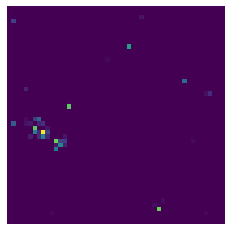

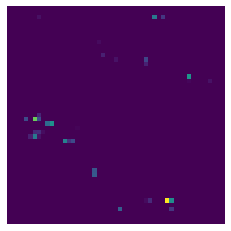

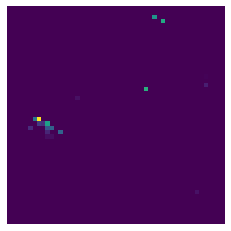

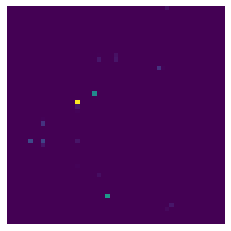

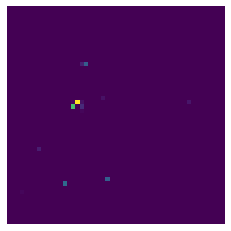

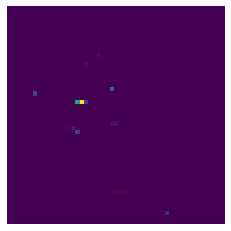

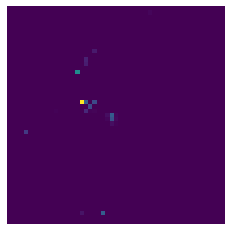

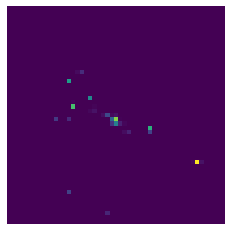

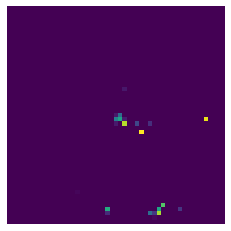

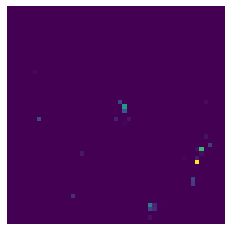

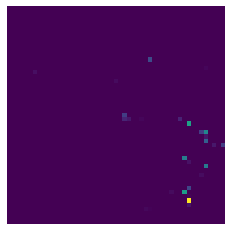

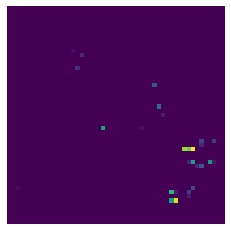

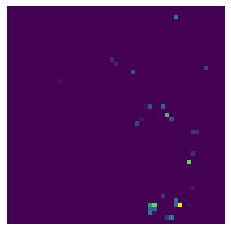

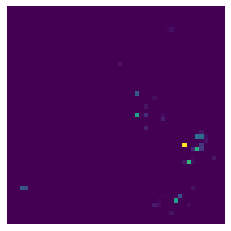

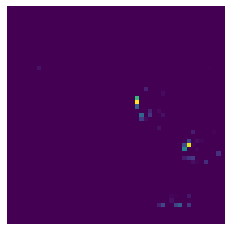

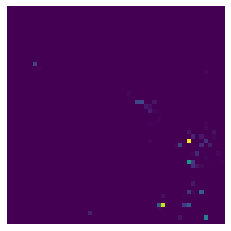

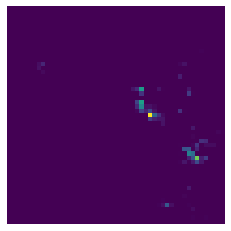

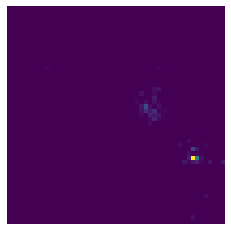

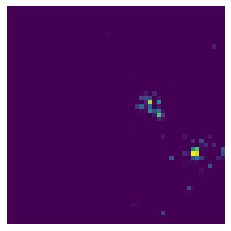

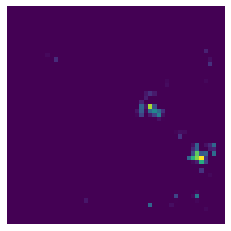

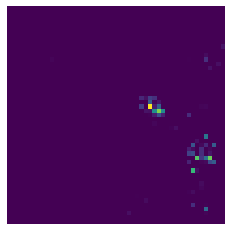

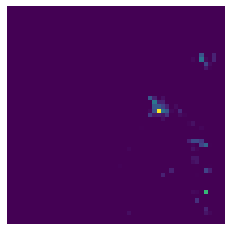

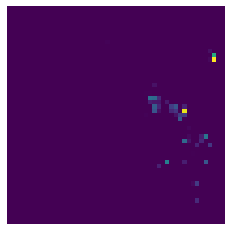

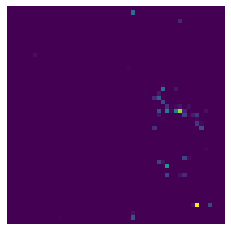

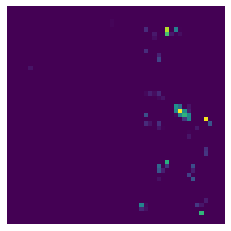

In [21]:
for r in np.rollaxis(generated_images[0].squeeze(-1), 2):
    plt.imshow(r)
    plt.axis('off')
    plt.show()